## Code for comparing and fine tuning susceptibility values </br>

This code requires you to be able of creating different simulated fieldmaps where 1 value can be dinamically changed. </br>
This notebook will also have an option to display figures and statistics (for validation of FM comparison values in terms of a varying susceptibility label)

In [1]:
import numpy as np
import nibabel as nib
import os
import matplotlib.pyplot as plt

In [13]:
# Importing the fieldmaps 
fm_ppm_og = nib.load("data/lung_fitting_project/manually/fms/ppm/sim_fm_0_3.nii.gz")


In [3]:
def convert_ppm_to_Hz(nifti_ppm, B0):
    fm_ppm = nifti_ppm.get_fdata()
    # When creating fieldmaps with susceptiblity to fieldmap repository, the output will be in PPM so we need to rescale to Tesla
    gamma = 42.58 # [Hz/T] 
    f0 = B0*gamma
    fm_Hz = fm_ppm*f0
    return fm_Hz

In [14]:
fm_Hz = convert_ppm_to_Hz(fm_ppm_og,3)
# Saving the new FM in Hz with the affine of input ppm image!
new_img = nib.Nifti1Image(fm_Hz, affine = fm_ppm_og.affine)
# Select a name according to the input fieldmap
nib.save(new_img,"data/lung_fitting_project/manually/fms/Hz/sim_fm_Hz_0_3.nii.gz")

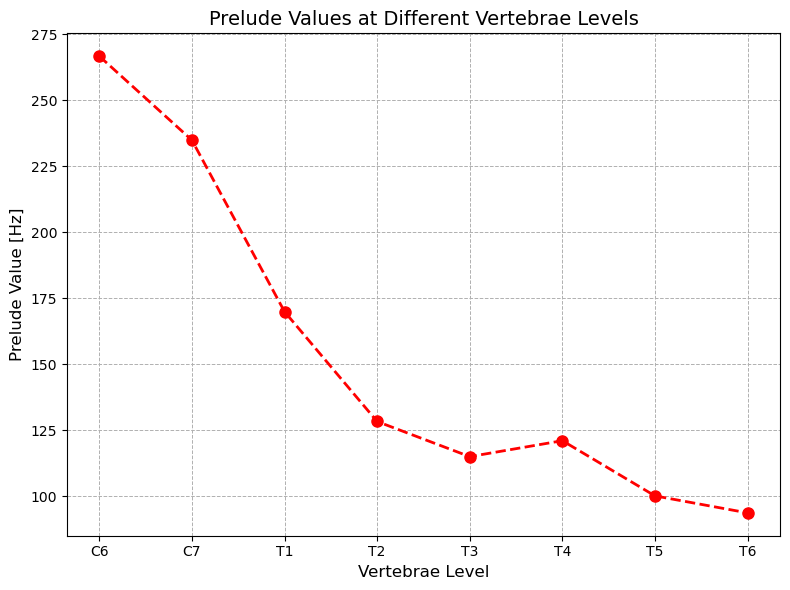

In [17]:

# Data for vertebrae levels and prelude values
vertebrae_levels = ['C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6']
prelude_values = [266.76, 234.93, 169.97, 128.37, 115.06, 121.10, 100.19, 93.75]

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(vertebrae_levels, prelude_values, marker='o', color='r', linestyle='--', linewidth=2, markersize=8)

# Add titles and labels
plt.title('Prelude Values at Different Vertebrae Levels', fontsize=14)
plt.xlabel('Vertebrae Level', fontsize=12)
plt.ylabel('Prelude Value [Hz]', fontsize=12)

# Customize grid and display
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.tight_layout()

# Show the plot
plt.show()


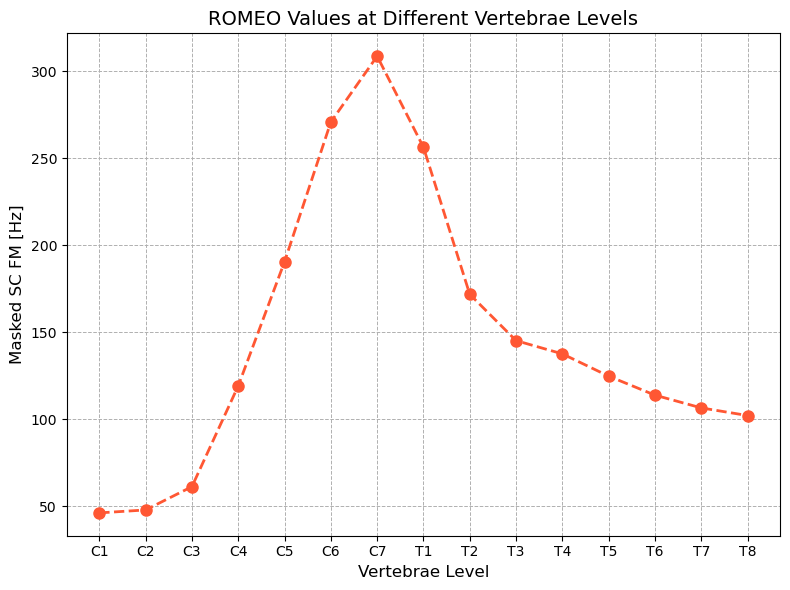

In [14]:
# Data for vertebrae levels and prelude values
vertebrae_levels = ['C1','C2','C3','C4', 'C5', 'C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6','T7','T8']

romeo_all_fov = [46.09, 47.78, 61.17, 119.09, 190.46, 270.79, 308.63, 256.27, 171.73, 145.12, 137.50, 124.69,113.77,106.44,102.05]

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(vertebrae_levels, romeo_all_fov, marker='o', color='#FF5733', linestyle='--', linewidth=2, markersize=8)

# Add titles and labels
plt.title('ROMEO Values at Different Vertebrae Levels', fontsize=14)
plt.xlabel('Vertebrae Level', fontsize=12)
plt.ylabel('Masked SC FM [Hz]', fontsize=12)

# Customize grid and display
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.tight_layout()

# Show the plot
plt.show()

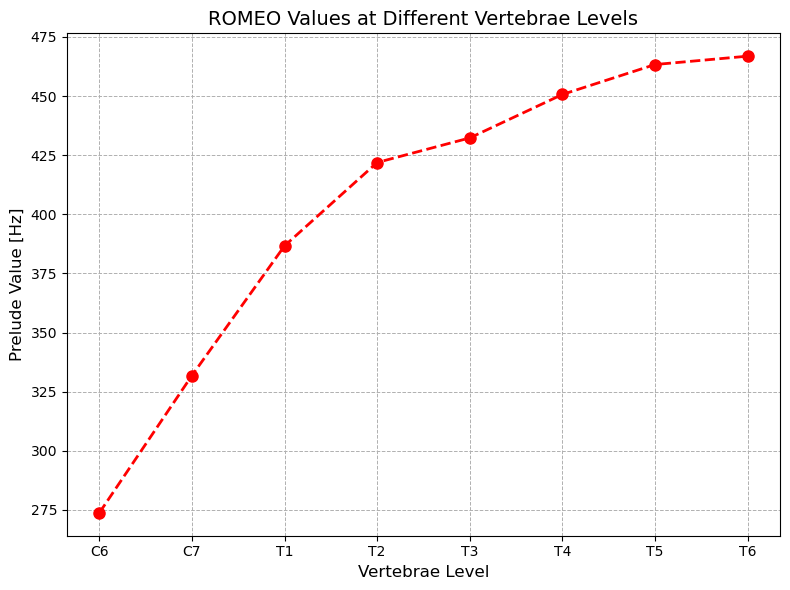

In [20]:
# Data for vertebrae levels and prelude values
vertebrae_levels = ['C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6']
romeo_body_mask = [273.76, 331.83, 386.67, 421.9, 432.3, 450.67, 463.32, 466.86]

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(vertebrae_levels, prelude_values, marker='o', color='r', linestyle='--', linewidth=2, markersize=8)

# Add titles and labels
plt.title('ROMEO Values at Different Vertebrae Levels', fontsize=14)
plt.xlabel('Vertebrae Level', fontsize=12)
plt.ylabel('Prelude Value [Hz]', fontsize=12)

# Customize grid and display
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Data for vertebrae levels and prelude values
vertebrae_levels = ['C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6']
sim_0hz = [668.2, 609.7, 644.9, 634.7, 626.3, 633.46, 664.18, 632.91]
sim_1hz = [667.6, 609.2, 644.4, 634.7, 626.1, 633.38 664.29, 633.00]
sim_2hz = [667, 608.6, 644.4, 634.7, 626, 633.28, 664.39, 633.08]
sim_3hz = [666.4, 608.1, 644.3, 634.6, 625.9, 633.18, 664.5, 633.16]


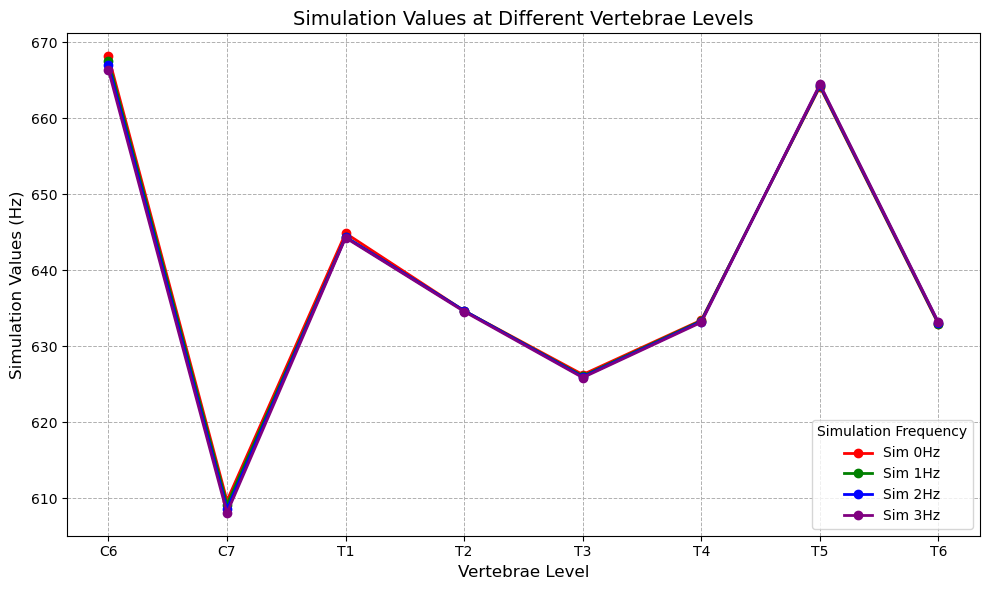

In [21]:
# Data for vertebrae levels and values from Simulated FM
vertebrae_levels = ['C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6']
sim_0hz = [668.2, 609.7, 644.9, 634.7, 626.3, 633.46, 664.18, 632.91]
sim_1hz = [667.6, 609.2, 644.4, 634.7, 626.1, 633.38, 664.29, 633.00]
sim_2hz = [667, 608.6, 644.4, 634.7, 626, 633.28, 664.39, 633.08]
sim_3hz = [666.4, 608.1, 644.3, 634.6, 625.9, 633.18, 664.5, 633.16]

# Create the plot
plt.figure(figsize=(10, 6))

# Plot each simulation set with different line styles and colors
plt.plot(vertebrae_levels, sim_0hz, marker='o', linestyle='-', color='r', label='Sim 0Hz', linewidth=2)
plt.plot(vertebrae_levels, sim_1hz, marker='o', linestyle='-', color='g', label='Sim 1Hz', linewidth=2)
plt.plot(vertebrae_levels, sim_2hz, marker='o', linestyle='-', color='b', label='Sim 2Hz', linewidth=2)
plt.plot(vertebrae_levels, sim_3hz, marker='o', linestyle='-', color='purple', label='Sim 3Hz', linewidth=2)

# Add titles and labels
plt.title('Simulation Values at Different Vertebrae Levels', fontsize=14)
plt.xlabel('Vertebrae Level', fontsize=12)
plt.ylabel('Simulation Values (Hz)', fontsize=12)

# Add a legend
plt.legend(title='Simulation Frequency')

# Customize grid and display
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.tight_layout()

# Show the plot
plt.show()


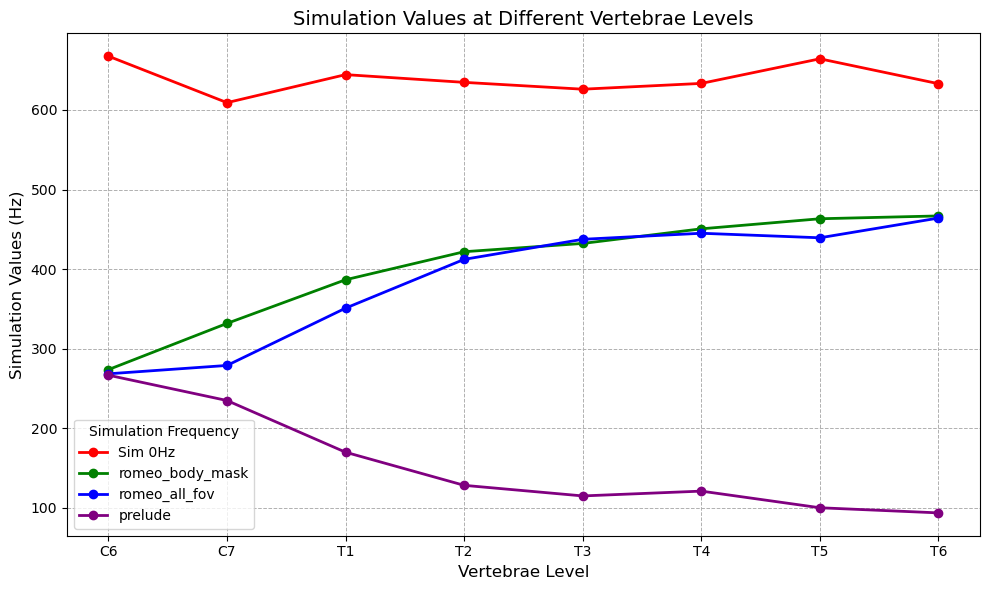

In [25]:
# Now comparing all of them together

# Data for vertebrae levels and values from Simulated FM
vertebrae_levels = ['C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6']
sim_1hz = [667.6, 609.2, 644.4, 634.7, 626.1, 633.38, 664.29, 633.00]
romeo_body_mask = [273.76, 331.83, 386.67, 421.9, 432.3, 450.67, 463.32, 466.86]
romeo_all_fov = [268.5, 279, 351, 412.3, 437.5, 445.1, 439.4, 464.2]
prelude_values = [266.76, 234.93, 169.97, 128.37, 115.06, 121.10, 100.19, 93.75]

# Create the plot
plt.figure(figsize=(10, 6))

# Plot each simulation set with different line styles and colors
plt.plot(vertebrae_levels, sim_1hz, marker='o', linestyle='-', color='r', label='Sim 0Hz', linewidth=2)
plt.plot(vertebrae_levels, romeo_body_mask, marker='o', linestyle='-', color='g', label='romeo_body_mask', linewidth=2)
plt.plot(vertebrae_levels, romeo_all_fov, marker='o', linestyle='-', color='b', label='romeo_all_fov', linewidth=2)
plt.plot(vertebrae_levels, prelude_values, marker='o', linestyle='-', color='purple', label='prelude', linewidth=2)

# Add titles and labels
plt.title('Simulation Values at Different Vertebrae Levels', fontsize=14)
plt.xlabel('Vertebrae Level', fontsize=12)
plt.ylabel('Simulation Values (Hz)', fontsize=12)

# Add a legend
plt.legend(title='Simulation Frequency')

# Customize grid and display
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.tight_layout()

# Show the plot
plt.show()

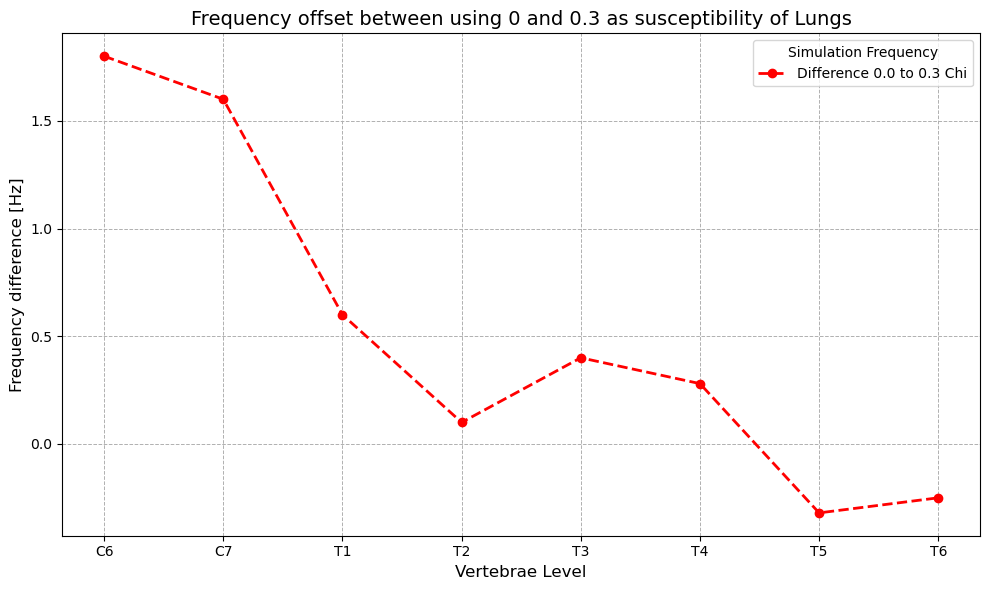

: 

In [32]:
vertebrae_levels = ['C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6']
sim_0hz = [668.2, 609.7, 644.9, 634.7, 626.3, 633.46, 664.18, 632.91]
sim_1hz = [667.6, 609.2, 644.4, 634.7, 626.1, 633.38, 664.29, 633.00]
sim_2hz = [667, 608.6, 644.4, 634.7, 626, 633.28, 664.39, 633.08]
sim_3hz = [666.4, 608.1, 644.3, 634.6, 625.9, 633.18, 664.5, 633.16]
diff_0_to_3 = [sim_0hz[i]- sim_3hz[i] for i in range(len(sim_0hz))]
# Create the plot
plt.figure(figsize=(10, 6))

# Plot each simulation set with different line styles and colors
plt.plot(vertebrae_levels, diff_0_to_3, marker='o', linestyle='--', color='r', label='Difference 0.0 to 0.3 Chi', linewidth=2)


# Add titles and labels
plt.title('Frequency offset between using 0 and 0.3 as susceptibility of Lungs', fontsize=14)
plt.xlabel('Vertebrae Level', fontsize=12)
plt.ylabel('Frequency difference [Hz]', fontsize=12)

# Add a legend
plt.legend(title='Simulation Frequency')

# Customize grid and display
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.tight_layout()

# Show the plot
plt.show()

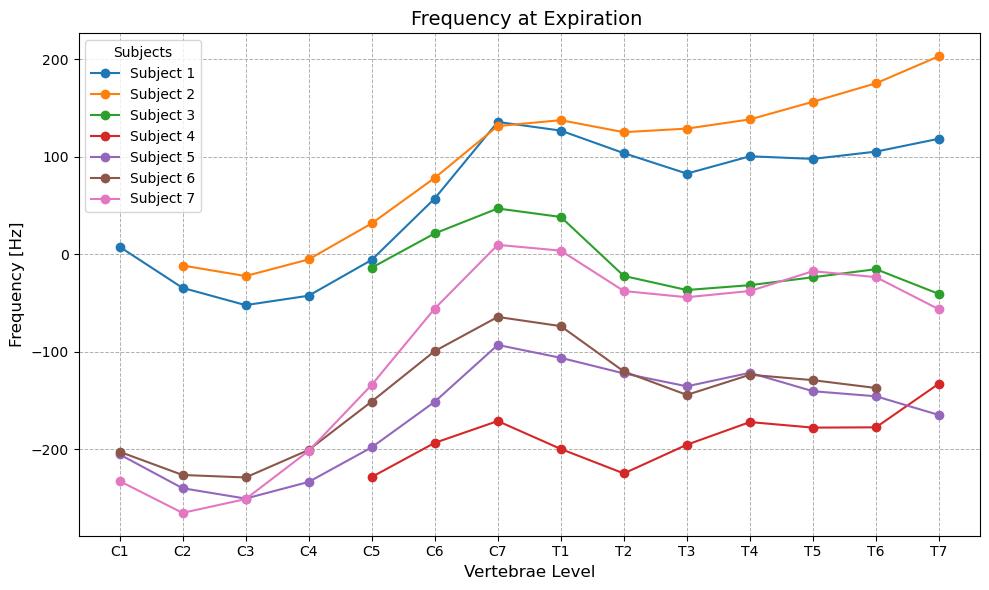

In [4]:

import matplotlib.pyplot as plt

# Vertebrae levels
vertebrae_levels = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7']

# Data for each subject
subject_1 = [7.59, -34.6007, -52.3003, -42.6437, -5.9548, 57.042, 135.5913, 126.6842, 103.5654, 82.6003, 100.3445, 97.6636, 105.1348, 118.3616]
subject_2 = [None, -11.6853, -22.4791, -5.4339, 31.4837, 78.1532, 131.36, 137.3891, 125.0578, 128.7363, 138.1833, 156.2578, 175.2279, 203.0289]
subject_3 = [None, None, None, None, -13.9386, 21.2257, 46.7966, 38.1248, -22.3754, -36.8096, -31.8351, -23.7288, -15.4443, -40.8946]
subject_4 = [None, None, None, None, -228.6019, -193.5839, -171.2021, -199.8416, -224.9235, -195.4644, -172.244, -177.9491, -177.6314, -132.7534]
subject_5 = [-205.3942, -240.0692, -250.7232, -233.6462, -198.1835, -151.4187, -93.142, -106.3501, -122.3663, -135.5931, -121.7053, -140.6057, -145.8088, -165.0143]
subject_6 = [-202.6622, -226.5181, -229.053, -200.8516, -151.2027, -99.4635, -64.4199, -73.8542, -120.3333, -144.3859, -123.7065, -129.2591, -137.3084, None]
subject_7 = [-232.7314, -265.3924, -251.2442, -201.8683, -134.113, -55.8687, 9.5106, 3.5705, -37.8451, -44.2236, -37.8199, -17.5026, -23.6079, -56.6628]

# Plot each subject's data
plt.figure(figsize=(10, 6))

plt.plot(vertebrae_levels, subject_1, marker='o', linestyle='-', label='Subject 1')
plt.plot(vertebrae_levels, subject_2, marker='o', linestyle='-', label='Subject 2')
plt.plot(vertebrae_levels, subject_3, marker='o', linestyle='-', label='Subject 3')
plt.plot(vertebrae_levels, subject_4, marker='o', linestyle='-', label='Subject 4')
plt.plot(vertebrae_levels, subject_5, marker='o', linestyle='-', label='Subject 5')
plt.plot(vertebrae_levels, subject_6, marker='o', linestyle='-', label='Subject 6')
plt.plot(vertebrae_levels, subject_7, marker='o', linestyle='-', label='Subject 7')

# Add titles and labels
plt.title('Frequency at Expiration ', fontsize=14)
plt.xlabel('Vertebrae Level', fontsize=12)
plt.ylabel('Frequency [Hz]', fontsize=12)

# Add a legend
plt.legend(title='Subjects')

# Customize grid and display
plt.grid(True, which='both', linestyle='--', linewidth=0.7)
plt.tight_layout()

# Show the plot
plt.show()


In [7]:
subject_1_new = [-12.8713, -23.303, -7.1472, 54.2169, 134.7229, 227.0454, 191.9893, 129.7039, 70.1694, 75.0041, 65.1696, 67.1581, 91.1664]
subject_2_new = [10.7813, 16.4291, 64.8201, 124.5642, 203.177, 281.7706, 222.7508, 144.5002, 110.3398, 94.5461, 95.1116, 92.5768, 115.797]
subject_3_new = [None, None, None, 68.759, 107.1569, 139.9451, 90.7787, -15.6666, -54.7061, -53.3148, -45.7928, -52.0505, -72.6472]
subject_4_new = [None, None, None, -164.595, -127.7346, -126.6101, -216.4167, -277.9714, -256.1871, -227.0772, -217.5476, -217.8526, -227.6934]
subject_5_new = [-225.7556, -234.2244, -205.5213, -160.1161, -96.9475, -35.9646, -68.2381, -118.2622, -168.3051, -168.7244, -170.8654, -165.1222, -179.3658]
subject_6_new = [-205.9043, -202.5054, -160.9249, -98.2584, -39.6323, -12.6573, -45.6169, -123.4673, -157.5324, -158.9428, -173.5166, -177.3346, None]
subject_7_new = [-255.7612, -238.0679, -189.1749, -111.9536, -31.5937, 39.5668, 30.9139, -28.773, -53.0035, -53.823, -40.9392, -40.2784, -68.4795]

# Inspiration values